In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [47]:
#all_hq_clust = pd.read_excel('../2023_Clusters/FINAL_tables/FINAL_all_bins_all_clusters.xlsx')
all_hq_clust.head()

,recovered_genome,sample,primary_cluster_x,original_secondary_cluster_x,secondary_cluster_x,part,completeness,contamination,strain_heterogeneity,length,...,bst_genome_1st_layer,genome,threshold,cluster_method,comparison_algorithm,greedy_representative,primary_cluster_y,original_secondary_cluster_y,secondary_cluster_y,final_genomes
0,V00H9L_vamb.216248.fa,V00H9L,p6-487,487_1,p6-487_1,p6,96.55,1.72,0.00,2439293,...,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa,0.05,greedy,fastANI,1.0,1737.0,1737_1,1737_1,V00H9L_vamb.216248.fa
1,VEZUDR_vamb.198244.fa,VEZUDR,p6-487,487_1,p6-487_1,p6,96.55,3.45,0.00,1903915,...,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa,0.05,greedy,fastANI,1.0,1737.0,1737_1,1737_1,V00H9L_vamb.216248.fa
2,VF9LPS_maxbin.061.fa,VF9LPS,p6-487,487_1,p6-487_1,p6,96.55,17.40,0.00,2585977,...,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa,0.05,greedy,fastANI,1.0,1737.0,1737_1,1737_1,V00H9L_vamb.216248.fa
3,VFK4IA_vamb.287384_sub.fa,VFK4IA,p6-487,487_1,p6-487_1,p6,96.55,5.64,14.29,1904630,...,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa,0.05,greedy,fastANI,1.0,1737.0,1737_1,1737_1,V00H9L_vamb.216248.fa
4,VI72RB_maxbin.021.fa,VI72RB,p6-487,487_1,p6-487_1,p6,96.55,5.17,0.00,2350493,...,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa,0.05,greedy,fastANI,1.0,1737.0,1737_1,1737_1,V00H9L_vamb.216248.fa


In [53]:
len(all_hq_clust)

70483

## Read the DATA

In [43]:
all_clust = pd.read_excel('results/FINAL_all_clusters.xlsx')
len(all_clust)
all_clust.head()

,recovered_genome,sample,secondary_cluster,part,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,...,domain,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes,number_of_bins_per_HQcluster,number_of_bins_per_LQcluster
0,V00H9L_vamb.216248.fa,V00H9L,p6-487_1,p6,96.55,1.72,0.00,2439293.0,206313.0,HQ,...,Bacteria,Bacillota_A,Clostridia,Christensenellales,Borkfalkiaceae,UBA10281,UBA10281 sp900764105,NaN,17.0,NaN
1,VEZUDR_vamb.198244.fa,VEZUDR,p6-487_1,p6,96.55,3.45,0.00,1903915.0,143532.0,HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VF9LPS_maxbin.061.fa,VF9LPS,p6-487_1,p6,96.55,17.40,0.00,2585977.0,45863.0,LQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VFK4IA_vamb.287384_sub.fa,VFK4IA,p6-487_1,p6,96.55,5.64,14.29,1904630.0,43850.0,MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VI72RB_maxbin.021.fa,VI72RB,p6-487_1,p6,96.55,5.17,0.00,2350493.0,113529.0,MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
len(all_clust)

85956

Text(0.5, 1.0, 'All \n bins quality (n=85,956)')

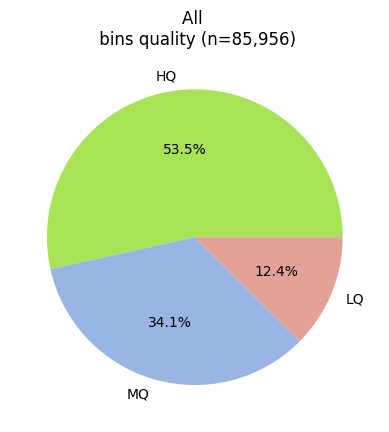

In [55]:
vcount = all_clust['Bin_qual'].value_counts()
vcount = vcount.reindex(['HQ', 'MQ', 'LQ'])

plt.pie(vcount, labels=['HQ', 'MQ', 'LQ'], autopct='%1.1f%%', colors=['#a7e354', '#98b5e3', '#e3a198'])
plt.title("All \n bins quality (n=85,956)")

## Find species

Bacteroides uniformis

In [50]:
fnd_gn = all_clust[all_clust['genus'] == 'Bacteroides']
fnd_sp = fnd_gn[fnd_gn['sp'] == 'Bacteroides uniformis']

fnd_gn['sp'].value_counts().head()

Bacteroides uniformis           72
Bacteroides caccae              38
Bacteroides xylanisolvens       36
Bacteroides cellulosilyticus    31
Bacteroides sp900755095         27
Name: sp, dtype: int64

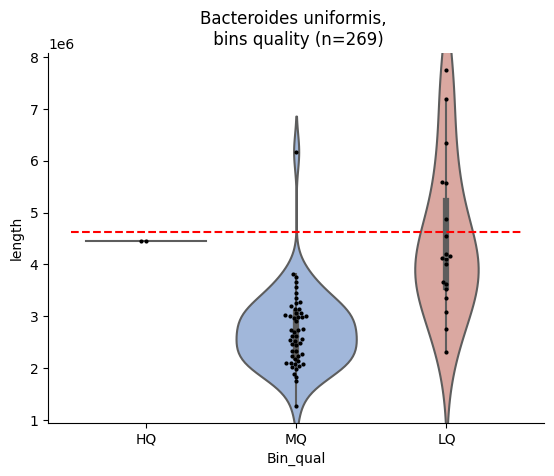

In [52]:
sns.violinplot(y='length', x='Bin_qual', data=fnd_sp, order=[ "HQ", "MQ", "LQ"], palette=['#a7e354', '#98b5e3', '#e3a198'])
plt.title("Bacteroides uniformis, \n bins quality (n=269)")
sns.despine()
sns.swarmplot(y='length', x='Bin_qual', data=fnd_sp, order=[ "HQ", "MQ", "LQ"], color='black', size=3)
plt.hlines(y=4629452, xmin=-0.5, xmax=2.5, color='red', linestyle='--')

#plt.savefig('results/Bacteroides_uniformis_bins_qual_length.jpg', dpi=150)

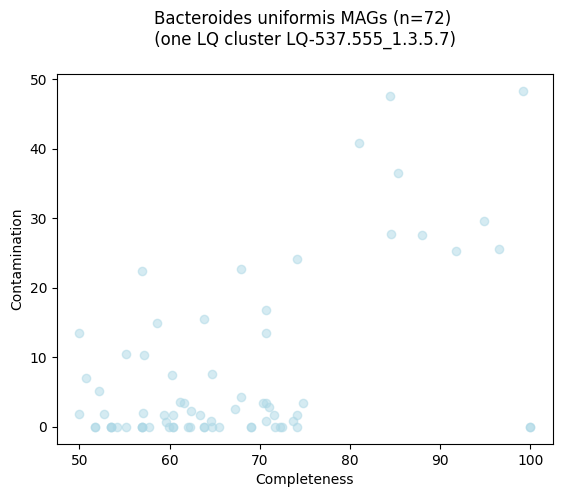

In [51]:
# make plt
plt.scatter(fnd_sp['completeness'], fnd_sp['contamination'], color = 'lightblue', alpha=0.5)
plt.xlabel('Completeness')
plt.ylabel('Contamination')
plt.title('Bacteroides uniformis MAGs (n=72) \n (one LQ cluster LQ-537.555_1.3.5.7) \n ')

plt.savefig('results/Bacteroides_uniformis_MAGs.png', dpi=300, bbox_inches='tight')


In [45]:
# Phocaeicola vulgatus in all clusters
fnd_gn = all_clust[all_clust['genus'] == 'Phocaeicola']
fnd_sp = fnd_gn[fnd_gn['sp'] == 'Phocaeicola vulgatus']

fnd_gn['sp'].value_counts().head()

Phocaeicola vulgatus        133
Phocaeicola plebeius_A       62
Phocaeicola dorei            48
Phocaeicola coprocola        37
Phocaeicola massiliensis     19
Name: sp, dtype: int64

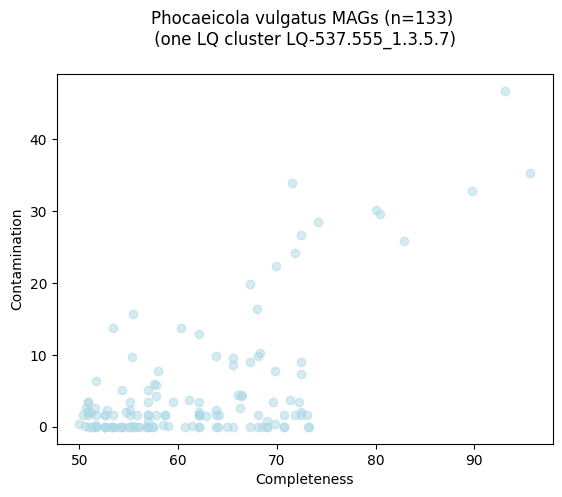

In [29]:
# make plt
plt.scatter(fnd_sp['completeness'], fnd_sp['contamination'], color = 'lightblue', alpha=0.5)
plt.xlabel('Completeness')
plt.ylabel('Contamination')
plt.title('Phocaeicola vulgatus MAGs (n=133) \n (one LQ cluster LQ-537.555_1.3.5.7) \n ')

plt.savefig('results/Phocaeicola_vulgatus_MAGs.png', dpi=300, bbox_inches='tight')


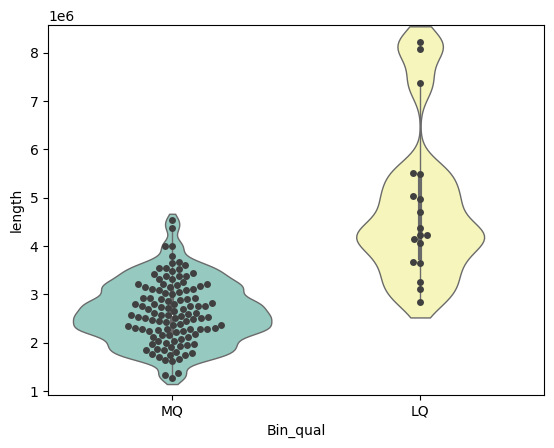

In [39]:
sns.violinplot(y="length", x="Bin_qual", data=fnd_sp, palette="Set3", bw=.2, cut=1, linewidth=1)
sns.swarmplot(y="length", x="Bin_qual", data=fnd_sp, color=".25")

plt.savefig('results/Phocaeicola_vulgatus_MAGs_length.png', dpi=300, bbox_inches='tight')

In [41]:
fnd_gn['sp'].value_counts().head()

Phocaeicola vulgatus        133
Phocaeicola plebeius_A       62
Phocaeicola dorei            48
Phocaeicola coprocola        37
Phocaeicola massiliensis     19
Name: sp, dtype: int64